- Implement performance metrics

# Import Packages and Set Options

In [22]:
# import packages

# general tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
from io import StringIO

# RDkit
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem

# Prepare Data

## Prepare Data: MoleculeNet_QM7

In [23]:
# import data (I took a .csv file of QM7 I found on the Deepchem website, but it apparently has slightly less molecules than the .mat file one can download from MoleculeNet)

dataframe = pd.read_csv("data/MoleculeNet_QM7/qm7.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  6834


,smiles,u0_atom
0,C([H])([H])([H])[H],-417.96
1,[H]C([H])([H])C([H])([H])[H],-712.42
2,[H]C([H])=C([H])[H],-564.21
3,[H]C#C[H],-404.88
4,[H]OC([H])([H])C([H])([H])[H],-808.87
...,...,...
6829,[H]C(=C(C#N)C([H])([H])[H])C([H])([H])C([H])([...,-1919.54
6830,[H]C(=C([H])C([H])(N([H])[H])C([H])([H])[H])C(...,-1657.63
6831,[H]C(=C([H])C([H])([H])C([H])([H])[H])C([H])([...,-1662.10
6832,[H]C([H])=C(C([H])([H])C([H])([H])[H])C([H])([...,-1782.01


In [5]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['u0_atom'].isnull()])

,smiles,u0_atom


,smiles,u0_atom


In [6]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

6834


In [7]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  6834


In [9]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"u0_atom"].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value -1544.724847819725
Standard Deviation  222.85913626690564
Shape of y =  (6834,)
Shape of Y =  (6834, 1)

 y =  [ -417.96  -712.42  -564.21 ... -1662.1  -1782.01 -1919.  ]


In [10]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value 5.323352073590449e-16
Standard Deviation  1.0
Shape of y =  (6834,)
Shape of Y =  (6834, 1)

 y =  [ 5.05595089  3.73466783  4.39970676 ... -0.52667866 -1.06473154
 -1.67942476]


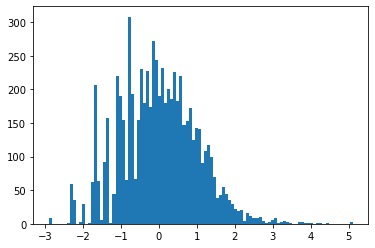

In [11]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
C([H])([H])([H])[H]


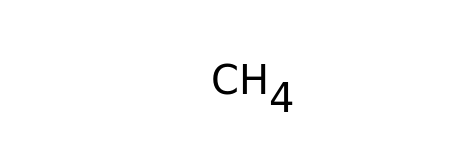

Shape of x_smiles =  (6834,)
Shape of X_smiles =  (6834, 1)

 x_smiles =  ['C([H])([H])([H])[H]' '[H]C([H])([H])C([H])([H])[H]'
 '[H]C([H])=C([H])[H]' '[H]C#C[H]' '[H]OC([H])([H])C([H])([H])[H]'
 '[H]C(=O)C([H])([H])[H]' '[H]C([H])([H])OC([H])([H])[H]'
 '[H]C1([H])C([H])([H])C1([H])[H]'
 '[H]C([H])([H])C([H])([H])C([H])([H])[H]'
 '[H]C([H])=C([H])C([H])([H])[H]']


In [12]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_QM8

In [24]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_QM8/qm8.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  21786


,smiles,E1-CC2,E2-CC2,f1-CC2,f2-CC2,E1-PBE0,E2-PBE0,f1-PBE0,f2-PBE0,E1-PBE0.1,E2-PBE0.1,f1-PBE0.1,f2-PBE0.1,E1-CAM,E2-CAM,f1-CAM,f2-CAM
0,[H]C([H])([H])[H],0.432952,0.432960,0.249728,0.249736,0.430218,0.430236,0.181436,1.815015e-01,0.430218,0.430236,0.181436,1.815015e-01,0.409931,0.409939,0.1832,0.1832
1,[H]N([H])[H],0.265220,0.350081,0.067015,0.030049,0.268386,0.349106,0.040761,3.164115e-02,0.268386,0.349106,0.040761,3.164115e-02,0.253853,0.334481,0.0575,0.0238
2,[H]O[H],0.286537,0.363579,0.037755,0.000000,0.291377,0.362091,0.019503,1.000000e-08,0.291377,0.362091,0.019503,1.000000e-08,0.278519,0.350074,0.0333,0.0000
3,[H]C#C[H],0.358629,0.358629,0.000000,0.000000,0.256321,0.268469,0.000000,0.000000e+00,0.256321,0.268469,0.000000,0.000000e+00,0.244879,0.255051,0.0000,0.0000
4,[H]C#N,0.319958,0.336074,0.000000,0.000000,0.295139,0.311657,0.000000,0.000000e+00,0.295139,0.311657,0.000000,0.000000e+00,0.283425,0.296993,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21781,[H]C([H])(N1C([H])([H])C1([H])[H])C(F)(F)F,0.271951,0.297488,0.049481,0.039746,0.279686,0.305949,0.045505,3.645832e-02,0.279686,0.305949,0.045505,3.645832e-02,0.276414,0.297798,0.0314,0.0409
21782,[H]C1([H])C([H])([H])C([H])(C(F)(F)F)C1([H])[H],0.343606,0.344621,0.044959,0.017041,0.347063,0.348212,0.003887,5.704017e-02,0.347063,0.348212,0.003887,5.704017e-02,0.336025,0.337881,0.0376,0.0107
21783,[H]N1C([H])([H])C([H])([H])C1([H])C(F)(F)F,0.256356,0.279425,0.005103,0.010683,0.264920,0.280065,0.002531,9.899310e-03,0.264920,0.280065,0.002531,9.899310e-03,0.253210,0.279390,0.0037,0.0086
21784,[H]C1([H])OC([H])(C(F)(F)F)C1([H])[H],0.271197,0.292573,0.000831,0.019204,0.279916,0.302611,0.000742,2.232390e-02,0.279916,0.302611,0.000742,2.232390e-02,0.274602,0.299852,0.0004,0.0195


In [110]:
# choose target variable

target = "E1-CC2"

In [111]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe[target].isnull()])

,smiles,E1-CC2,E2-CC2,f1-CC2,f2-CC2,E1-PBE0,E2-PBE0,f1-PBE0,f2-PBE0,E1-PBE0.1,E2-PBE0.1,f1-PBE0.1,f2-PBE0.1,E1-CAM,E2-CAM,f1-CAM,f2-CAM


,smiles,E1-CC2,E2-CC2,f1-CC2,f2-CC2,E1-PBE0,E2-PBE0,f1-PBE0,f2-PBE0,E1-PBE0.1,E2-PBE0.1,f1-PBE0.1,f2-PBE0.1,E1-CAM,E2-CAM,f1-CAM,f2-CAM


In [112]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

21786


In [113]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  21786


In [114]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:, target].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value 0.2200850052405214
Standard Deviation  0.04383185625022522
Shape of y =  (21786,)
Shape of Y =  (21786, 1)

 y =  [0.43295186 0.26521952 0.28653735 ... 0.25635598 0.27119673 0.262279  ]


In [116]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value 6.170691526935232e-16
Standard Deviation  1.0
Shape of y =  (21786,)
Shape of Y =  (21786, 1)

 y =  [4.85644171 1.02971945 1.51607416 ... 0.82750259 1.16608625 0.96263308]


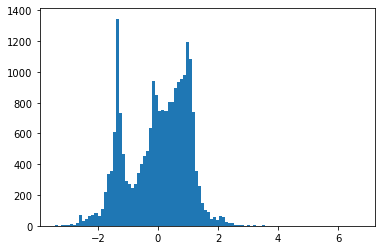

In [117]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
[H]C([H])([H])[H]


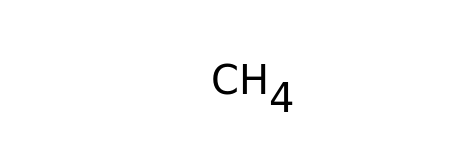

Shape of x_smiles =  (21786,)
Shape of X_smiles =  (21786, 1)

 x_smiles =  ['[H]C([H])([H])[H]' '[H]N([H])[H]' '[H]O[H]' '[H]C#C[H]' '[H]C#N'
 '[H]C([H])=O' '[H]C([H])([H])C([H])([H])[H]' '[H]OC([H])([H])[H]'
 '[H]C#CC([H])([H])[H]' '[H]C([H])([H])C#N']


In [118]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_QM9

In [25]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_QM9/qm9.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  133885


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,C1C2C3C4C5OC14C5N23,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,...,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438
133881,gdb_133882,C1N2C3C2C2C4OC12C34,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,...,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511
133882,gdb_133883,C1N2C3C4C5C2C13CN45,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,...,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391
133883,gdb_133884,C1N2C3C4C5CC13C2C45,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,...,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892


In [122]:
# choose target variable

target = "u0_atom"

In [123]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe[target].isnull()])

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom


In [124]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

133885


In [125]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  133885


In [126]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:, target].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value -1750.8129969943022
Standard Deviation  239.31247970393602
Shape of y =  (133885,)
Shape of Y =  (133885, 1)

 y =  [ -395.99959459  -276.86136336  -213.08762369 ... -1667.04542947
 -1794.60043892 -1603.47186517]


In [130]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value 4.7551726574377245e-17
Standard Deviation  1.0
Shape of y =  (133885,)
Shape of Y =  (133885, 1)

 y =  [ 5.66127351  6.15910894  6.42559625 ...  0.35003426 -0.18297183
  0.61568512]


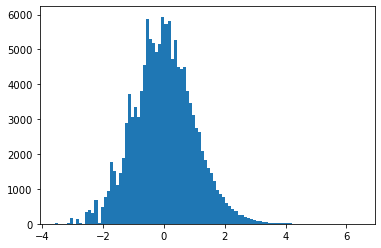

In [131]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
C


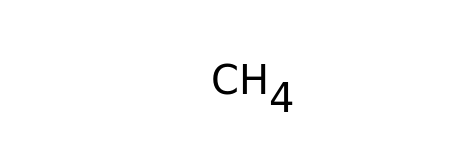

Shape of x_smiles =  (133885,)
Shape of X_smiles =  (133885, 1)

 x_smiles =  ['C' 'N' 'O' 'C#C' 'C#N' 'C=O' 'CC' 'CO' 'CC#C' 'CC#N']


In [132]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_ESOL

In [26]:
# import data 

dataframe = pd.read_csv("data/MoleculeNet_ESOL/esol.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  1128


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [223]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['measured log solubility in mols per litre'].isnull()])

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles


In [224]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

1128


In [225]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  1128


In [229]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"measured log solubility in mols per litre"].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value -3.05010195035461
Standard Deviation  2.0955117304559443
Shape of y =  (1128,)
Shape of Y =  (1128, 1)

 y =  [-0.77  -3.3   -2.06  ... -3.091 -3.18  -4.522]


In [228]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value -5.118049404300367e-17
Standard Deviation  1.0
Shape of y =  (1128,)
Shape of Y =  (1128, 1)

 y =  [ 1.08808837 -0.11925395  0.47248695 ... -0.01951697 -0.0619887
 -0.70240506]


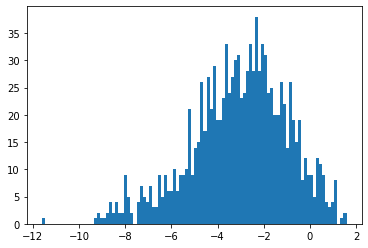

In [230]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O 


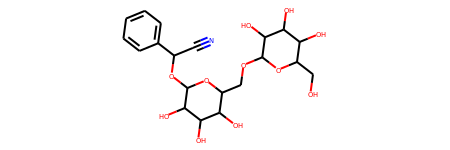

Shape of x_smiles =  (1128,)
Shape of X_smiles =  (1128, 1)

 x_smiles =  ['OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '
 'Cc1occc1C(=O)Nc2ccccc2' 'CC(C)=CCCC(C)=CC(=O)'
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'c1ccsc1' 'c2ccc1scnc1c2 '
 'Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl' 'CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O'
 'ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl'
 'COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C ']


In [231]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_Lipophilicity

In [27]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_Lipophilicity/lipophilicity.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  4200


,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...
...,...,...,...
4195,CHEMBL496929,3.85,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1
4196,CHEMBL199147,3.21,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...
4197,CHEMBL15932,2.10,COc1cccc2[nH]ncc12
4198,CHEMBL558748,2.65,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3


In [152]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['exp'].isnull()])

,CMPD_CHEMBLID,exp,smiles


,CMPD_CHEMBLID,exp,smiles


In [153]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

4200


In [154]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  4200


In [155]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"exp"].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value 2.1863357142857143
Standard Deviation  1.2028604901336188
Shape of y =  (4200,)
Shape of Y =  (4200, 1)

 y =  [ 3.54 -1.18  3.69 ...  2.1   2.65  2.7 ]


In [158]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value 8.458842092382146e-18
Standard Deviation  1.0
Shape of y =  (4200,)
Shape of Y =  (4200, 1)

 y =  [ 1.12537098 -2.7986086   1.25007372 ... -0.07177533  0.38546805
  0.42703563]


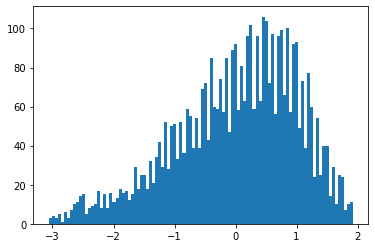

In [159]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14


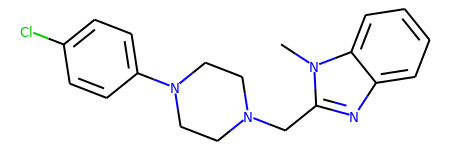

Shape of x_smiles =  (4200,)
Shape of X_smiles =  (4200, 1)

 x_smiles =  ['Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14'
 'COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)CCc3ccccc23'
 'COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl'
 'OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(Cl)sc4[nH]3'
 'Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)NCC#N)c1'
 'OC1(CN2CCC1CC2)C#Cc3ccc(cc3)c4ccccc4'
 'COc1cc(OC)c(cc1NC(=O)CCC(=O)O)S(=O)(=O)NCc2ccccc2N3CCCCC3'
 'CNc1cccc(CCOc2ccc(C[C@H](NC(=O)c3c(Cl)cccc3Cl)C(=O)O)cc2C)n1'
 'COc1ccc(cc1)C2=COc3cc(OC)cc(OC)c3C2=O' 'Oc1ncnc2scc(c3ccsc3)c12']


In [160]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_FreeSolv

In [28]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_FreeSolv/freesolv.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  642


,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
...,...,...,...,...
637,methyl octanoate,CCCCCCCC(=O)OC,-2.04,-3.035
638,pyrrolidine,C1CCNC1,-5.48,-4.278
639,4-hydroxybenzaldehyde,c1cc(ccc1C=O)O,-8.83,-10.050
640,1-chloroheptane,CCCCCCCCl,0.29,1.467


In [244]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['expt'].isnull()])

,iupac,smiles,expt,calc


,iupac,smiles,expt,calc


In [245]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

642


In [246]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  642


In [249]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"expt"].values
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Average Value -3.8030062305295944
Standard Deviation  3.844822204602953
Shape of y =  (642,)
Shape of Y =  (642, 1)

 y =  [-1.101e+01 -4.870e+00  1.830e+00 -5.450e+00 -4.210e+00 -6.270e+00
  2.340e+00 -3.920e+00  1.580e+00 -4.620e+00 -1.960e+00 -3.880e+00
 -4.330e+00 -2.490e+00 -2.550e+00 -4.780e+00 -1.460e+00 -2.220e+00
 -5.850e+00  2.880e+00 -6.340e+00 -6.100e+00 -5.480e+00 -4.100e+00
 -4.100e+00 -3.520e+00 -4.470e+00 -2.740e+00 -3.430e+00 -7.810e+00
 -8.000e-01  9.300e-01 -6.780e+00 -9.290e+00 -4.070e+00 -5.910e+00
 -2.130e+00 -3.640e+00 -2.680e+00  3.130e+00 -1.000e+01  2.060e+00
 -8.110e+00 -1.120e+00 -2.362e+01 -2.830e+00 -4.680e+00 -5.560e+00
 -3.650e+00 -5.490e+00  3.120e+00 -4.420e+00 -6.200e+00 -6.960e+00
 -1.600e-01 -2.500e-01 -9.300e+00 -4.630e+00 -1.022e+01 -3.560e+00
 -3.650e+00 -4.290e+00  1.070e+00 -9.510e+00 -2.300e-01 -1.100e-01
 -1.643e+01  5.600e-01 -3.200e+00 -9.310e+00 -1.880e+00 -1.421e+01
 -8.180e+00 -2.880e+00 -7.770e+00 -4.500e+00 -9.900e-01 -3.780e+00
 -8.40

In [248]:
# z-transform target variable Y/y to mean 0 and std 1

# z-transform
y = (y - np.mean(y))/np.std(y)
Y = np.reshape(y, (len(y), 1))

print("Average Value", np.mean(y))
print("Standard Deviation ", np.std(y))


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)

Average Value -1.5771392499348017e-16
Standard Deviation  1.0
Shape of y =  (642,)
Shape of Y =  (642, 1)

 y =  [-1.87446737e+00 -2.77514463e-01  1.46508887e+00 -4.28366692e-01
 -1.05855030e-01 -6.41640533e-01  1.59773480e+00 -3.04289154e-02
  1.40006636e+00 -2.12491950e-01  4.79347583e-01 -2.00253134e-02
 -1.37065836e-01  3.41499856e-01  3.25894453e-01 -2.54106358e-01
  6.09392608e-01  4.11724170e-01 -5.32402712e-01  1.73818343e+00
 -6.59846837e-01 -5.97425225e-01 -4.36169394e-01 -7.72451244e-02
 -7.72451244e-02  7.36071047e-02 -1.73478443e-01  2.76477344e-01
  9.70152092e-02 -1.04217921e+00  7.81052041e-01  1.23100783e+00
 -7.74286459e-01 -1.42711248e+00 -6.94424229e-02 -5.48008115e-01
  4.35132274e-01  4.23962987e-02  2.92082747e-01  1.80320594e+00
 -1.61177642e+00  1.52490958e+00 -1.12020623e+00  6.97823225e-01
 -5.15420290e+00  2.53069239e-01 -2.28097353e-01 -4.56976598e-01
  3.97953982e-02 -4.38770294e-01  1.80060504e+00 -1.60473940e-01
 -6.23434230e-01 -8.21102668e-01  9.475096

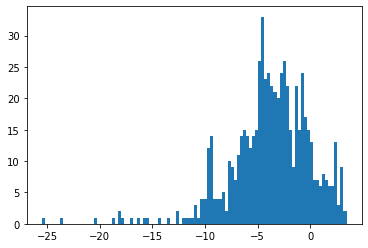

In [250]:
# plot histogram of target variable Y/y

plt.hist(y, bins = 100);

                  Smiles String
CN(C)C(=O)c1ccc(cc1)OC


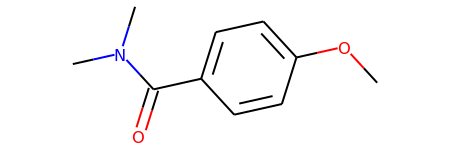

Shape of x_smiles =  (642,)
Shape of X_smiles =  (642, 1)

 x_smiles =  ['CN(C)C(=O)c1ccc(cc1)OC' 'CS(=O)(=O)Cl' 'CC(C)C=C' 'CCc1cnccn1'
 'CCCCCCCO' 'Cc1cc(cc(c1)O)C' 'CC(C)C(C)C' 'CCCC(C)(C)O'
 'C[C@@H]1CCCC[C@@H]1C' 'CC[C@H](C)O']


In [251]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

# Use Regression Method

## Implement a graph regression method of your liking here